In [2]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
import copy


Otimização Natural  - Lista de exercícios 2

01) Lista de Exercícios da CPE723 Edição Presencial - Exercício 1. No item 1(b), onde está escrito "três números aleatórios equiprováveis", leia-se "três números aleatórios, sorteados de PDF uniforme entre 0 e 1". 

![q1](img/Q1.png)


### ITEM a ###
P(3) = 
[[0.3765625]
 [0.378125 ]
 [0.4890625]]


### ITEM b ###
Valor final: 1 


### ITEM c ###
History shape: (100, 4)
History max: 2
History min: 0



### ITEM d ###


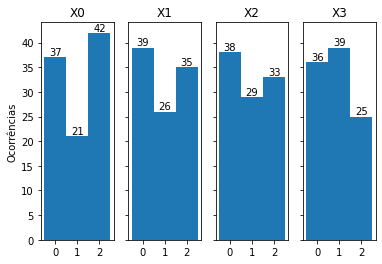

In [9]:
################# item a #################
transition_matrix = np.array([[0.50, 0.25, 0.25],
                              [0.25, 0.50, 0.25],
                              [0.50, 0.25, 0.50]])

p0 = np.array([[.3, .4, .3]]).T

tm_3 = np.linalg.matrix_power(transition_matrix, 3)

p_3 = np.matmul(tm_3, p0)

print("### ITEM a ###")
print("P(3) = \n{}\n\n".format(p_3))

################# item b #################
p0 = np.array([[0.0, 1.0, 0.0]]).T


def transition(X):
    transition_vec = transition_matrix.T[X]
    r = rd.uniform(0, 1)
    if r < transition_vec[0]:
        return 0
    if r < sum(transition_vec[0:2]):
        return 1
    else:
        return 2


X = 1
for _ in range(3):
    X = transition(X)

print("### ITEM b ###")
print("Valor final: {} \n\n".format(X))


################# item c #################
history = []
episode = []

for _ in range(100):
    X = rd.choice([0, 1, 2])
    episode.append(X)
    for _ in range(3):
        X = transition(X)
        episode.append(X)

    history.append(episode)
    episode = []

history = np.array(history)

print("### ITEM c ###")
print("History shape: {}".format(history.shape))
print("History max: {}".format(history.max()))
print("History min: {}".format(history.min()))

################# item d #################
print("\n\n")
print("### ITEM d ###")

fig, ax = plt.subplots(1, 4, sharey=True)
fig.axes[0].set_ylabel("Ocorrências"
for i in range(len(history.T)):
    x = history.T[i]
    bars_i = ax[i].hist(x, bins=(np.arange(4)-0.5))
    ax[i].bar_label(bars_i[-1], [int(l) for l in bars_i[0]])
    ax[i].set_title("X{}".format(i))
    ax[i].set_xticks((0, 1, 2))


02) Lista de Exercícios da CPE723 Edição Presencial - Exercício 2.

![q2](img/Q2.png)


03) Lista de Exercícios da CPE723 Edição Presencial - Exercício 3.

![q3](img/Q3.png)


04) Prova de 2009 - Questão 2, itens (a) e (c) (resolvida em aula no dia 12/04/2022).

![q4](img/Q4.png)


05) Prova de 2011 - Questão 2, itens (a), (b), e (e).

![q5](img/Q5.png)


06) (Opcional/Desafio) Prova de 2012 - Questão 3.

![q6_a](img/Q6_a.png)
![q6_b](img/Q6_b.png)

07) Prova de 2016 - Questão 2.

![q7](img/Q7.png)

08) Prova de 2016 - Questão 3.

![q8_a](img/Q8_b.png)
![q8_b](img/Q8_b.png)


09) Prova de 2017 - Questão 3, itens (b) e (c).

![q9](img/Q9.png)

10) Prova de 2018 - Questão 3

![q10](img/Q10.png)
